In [3]:
!pip install ydata-profiling 
!pip install seaborn
!pip install matplotlib

ERROR: Ignored the following versions that require a different python version: 4.0.0 Requires-Python >=3.7, <3.11; 4.1.0 Requires-Python >=3.7, <3.12; 4.1.1 Requires-Python >=3.7, <3.12; 4.1.2 Requires-Python >=3.7, <3.12; 4.10.0 Requires-Python <3.13,>=3.7; 4.11.0 Requires-Python <3.13,>=3.7; 4.12.0 Requires-Python <3.13,>=3.7; 4.12.1 Requires-Python <3.13,>=3.7; 4.12.2 Requires-Python <3.13,>=3.7; 4.13.0 Requires-Python <3.13,>=3.7; 4.14.0 Requires-Python <3.13,>=3.7; 4.15.0 Requires-Python <3.13,>=3.7; 4.15.1 Requires-Python <3.13,>=3.7; 4.16.0 Requires-Python <3.13,>=3.7; 4.16.1 Requires-Python <3.13,>=3.7; 4.2.0 Requires-Python >=3.7, <3.12; 4.3.0 Requires-Python >=3.7, <3.12; 4.3.1 Requires-Python >=3.7, <3.12; 4.3.2 Requires-Python >=3.7, <3.12; 4.4.0 Requires-Python >=3.7, <3.12; 4.5.0 Requires-Python >=3.7, <3.12; 4.5.1 Requires-Python >=3.7, <3.12; 4.6.0 Requires-Python >=3.7, <3.12; 4.6.1 Requires-Python >=3.7, <3.12; 4.6.2 Requires-Python >=3.7, <3.12; 4.6.3 Requires-Python

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
from google.colab import drive

ModuleNotFoundError: No module named 'ydata_profiling'

In [4]:
# Mount Google Drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/creditcard.csv'

# Load dataset
df = pd.read_csv(file_path)

Mounted at /content/drive


In [5]:
# Generate profiling report
profile = ProfileReport(df, title="Credit Card Fraud Detection Profiling Report", explorative=True)
profile_output_path = "/content/drive/MyDrive/BenHajBraiek-creditfraud-eda.html"
profile.to_file(profile_output_path)

# Basic dataset info
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
print("Missing values:", df.isnull().sum().sum())
print("Fraud distribution:\n", df["Class"].value_counts(normalize=True))

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 31/31 [00:19<00:00,  1.56it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Shape: (284807, 31)
Columns: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']
Missing values: 0
Fraud distribution:
 Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64


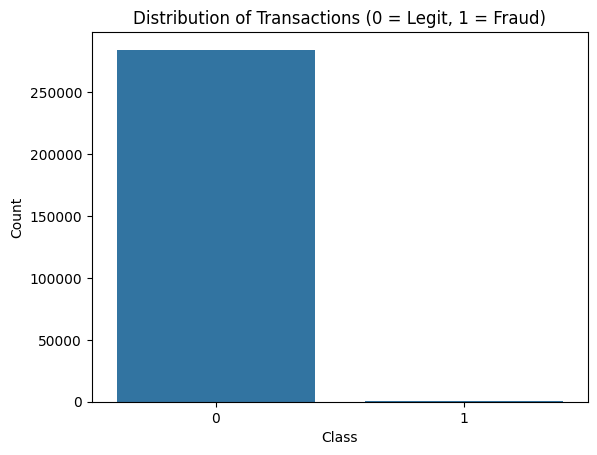

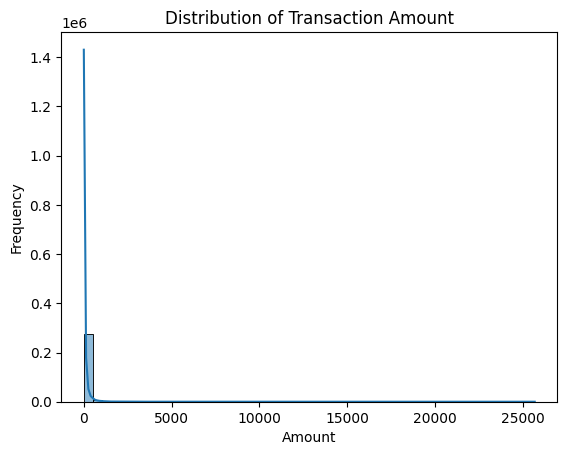

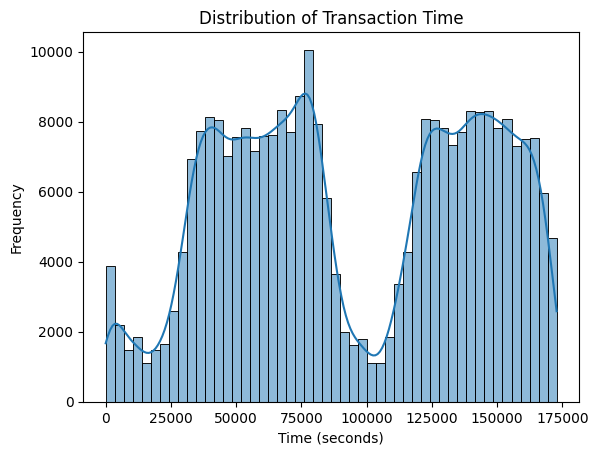

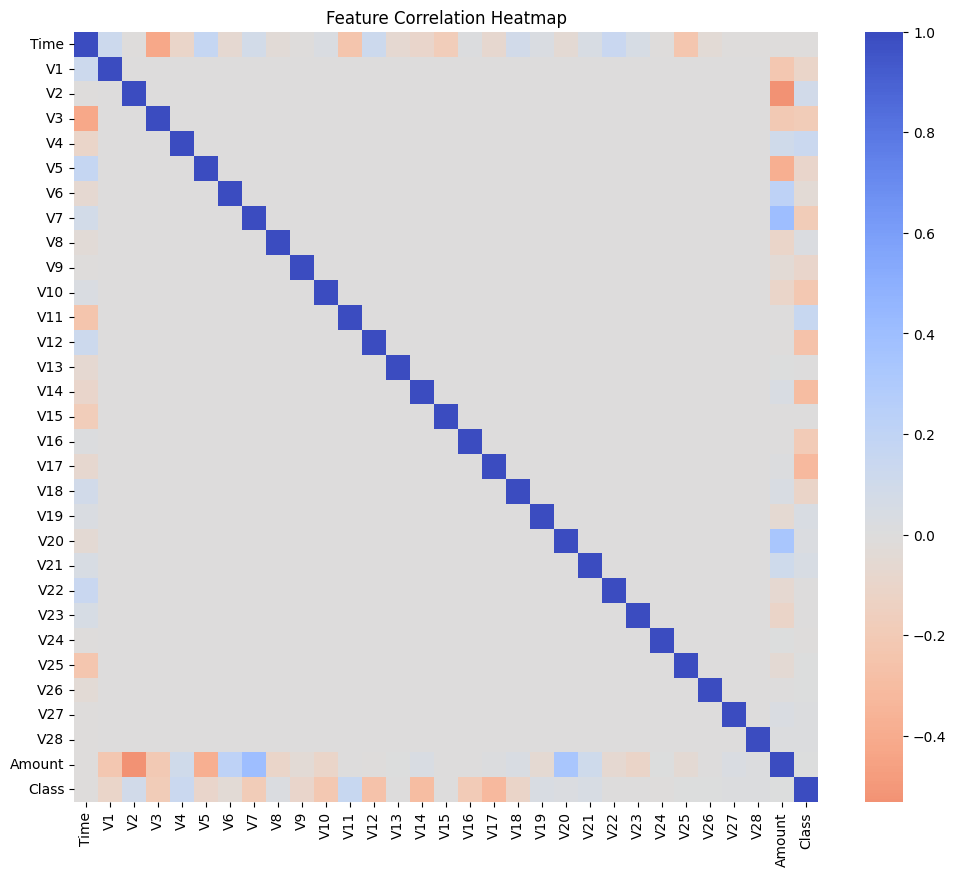

Top features correlated with fraud:
 V17    0.326481
V14    0.302544
V12    0.260593
V10    0.216883
V16    0.196539
Name: Class, dtype: float64


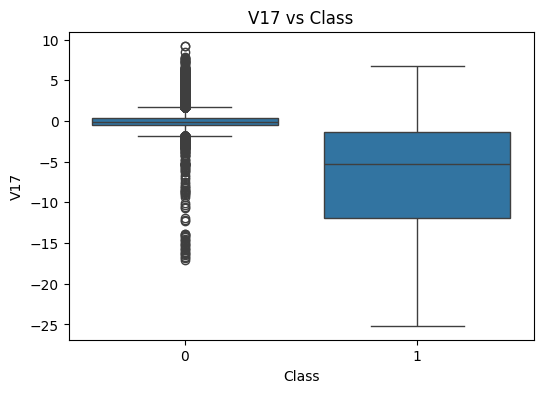

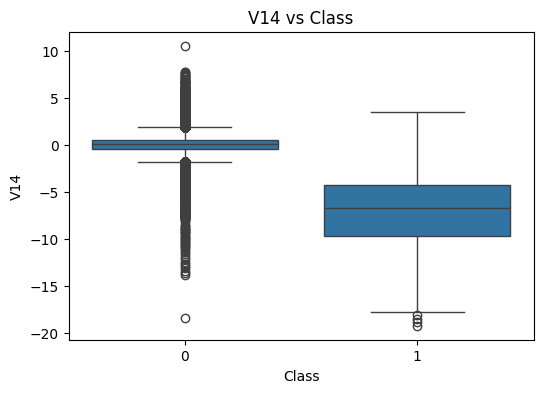

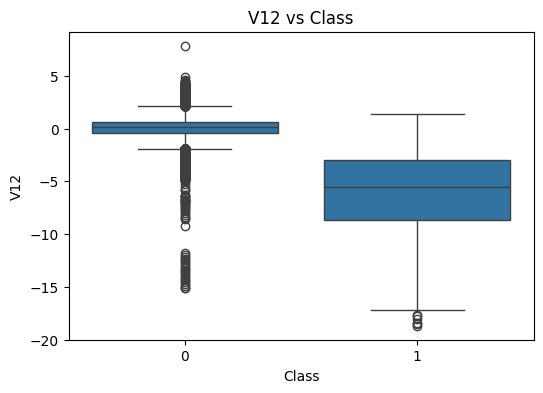

In [6]:
#  Visual EDA

# 1. Target distribution
sns.countplot(x='Class', data=df)
plt.title('Distribution of Transactions (0 = Legit, 1 = Fraud)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# 2. Distribution of transaction amount
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

# 3. Distribution of transaction time
sns.histplot(df['Time'], bins=50, kde=True)
plt.title('Distribution of Transaction Time')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency')
plt.show()

# 4. Correlation heatmap
plt.figure(figsize=(12, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, cmap='coolwarm_r', center=0)
plt.title("Feature Correlation Heatmap")
plt.show()

# 5. Top features correlated with fraud
cor_target = abs(corr_matrix["Class"]).sort_values(ascending=False)
print("Top features correlated with fraud:\n", cor_target[1:6])

# 6. Boxplots of top correlated features
top_features = cor_target[1:4].index.tolist()
for feature in top_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x="Class", y=feature, data=df)
    plt.title(f'{feature} vs Class')
    plt.show()